# DESAFÍO 1: DESCARGA DE DATOS PÚBLICOS

In [43]:
# Importar las librerías necesarias para su lectura y análisis preliminar
import pandas as pd
import numpy as np

Este es obtenido desde Kaggle el cual hace referencia a una actual recopilación de datos sobre los salarios de los Dada Scientists entre los años 2020 y 2023. Es muy interesante puesto aborda el rubro para el cuál nos estamos formando. Las variables más interesantes serían las relacionadas con la comparación entre los diferentes tipos de empleos que abarca la DS y los salarios correspondientes a los mismos y cual es su tendencia en lo que va del año y poder así tener una tendencia al finalizar el año. Además poder ver cuáles son los nichos más relevantes a nivel país sobre el tema.

In [44]:
url = "https://raw.githubusercontent.com/Rubencba222/Data-Science/refs/heads/main/1%20-%20Data%20Science%20Salaries%202023.csv"
df1 = pd.read_csv(url)
df1.head(10)

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   
5       2023               SE              FT         Applied Scientist   
6       2023               SE              FT         Applied Scientist   
7       2023               SE              FT            Data Scientist   
8       2023               SE              FT            Data Scientist   
9       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   
5  222200             USD         222200                 US             0   
6  136000             USD         136000                 US             0   
7  219000             USD         219000                 CA             0   
8  141000             USD         141000                 CA             0   
9  147100             USD         147100                 US             0   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M  
5               US            L  
6               US            L  
7               CA            M  
8               CA            M  
9               US            M

# DESAFÍO 2: DATA WRANGLING

In [45]:
# Renombrar columnas para una aproximación más sencilla

nuevos_nombres = {
    'work_year': "AÑO",
    'experience_level': "NIVEL_EXPERIENCIA",
    'employment_type': "TIPO_EMPLEO",
    'job_title': "PUESTO",
    'salary': "SALARIO",
    'salary_currency': "MONEDA",
    'salary_in_usd': "SALARIO_DOLARES",
    'employee_residence': "LUGAR_EMPLEO",
    'remote_ratio': "RATIO_REMOTO",
    'company_location': "UBICACION_COMPANIA",
    'company_size': "TAMANO_COMPANIA"
}

df1.rename(columns=nuevos_nombres, inplace=True)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 3755 non-null   int64 
 1   NIVEL_EXPERIENCIA   3755 non-null   object
 2   TIPO_EMPLEO         3755 non-null   object
 3   PUESTO              3755 non-null   object
 4   SALARIO             3755 non-null   int64 
 5   MONEDA              3755 non-null   object
 6   SALARIO_DOLARES     3755 non-null   int64 
 7   LUGAR_EMPLEO        3755 non-null   object
 8   RATIO_REMOTO        3755 non-null   int64 
 9   UBICACION_COMPANIA  3755 non-null   object
 10  TAMANO_COMPANIA     3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [47]:
df1.describe().round().T

count      mean       std     min       25%       50%  \
AÑO              3755.0    2022.0       1.0  2020.0    2022.0    2022.0   
SALARIO          3755.0  190696.0  671677.0  6000.0  100000.0  138000.0   
SALARIO_DOLARES  3755.0  137570.0   63056.0  5132.0   95000.0  135000.0   
RATIO_REMOTO     3755.0      46.0      49.0     0.0       0.0       0.0   

                      75%         max  
AÑO                2023.0      2023.0  
SALARIO          180000.0  30400000.0  
SALARIO_DOLARES  175000.0    450000.0  
RATIO_REMOTO        100.0       100.0

In [48]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

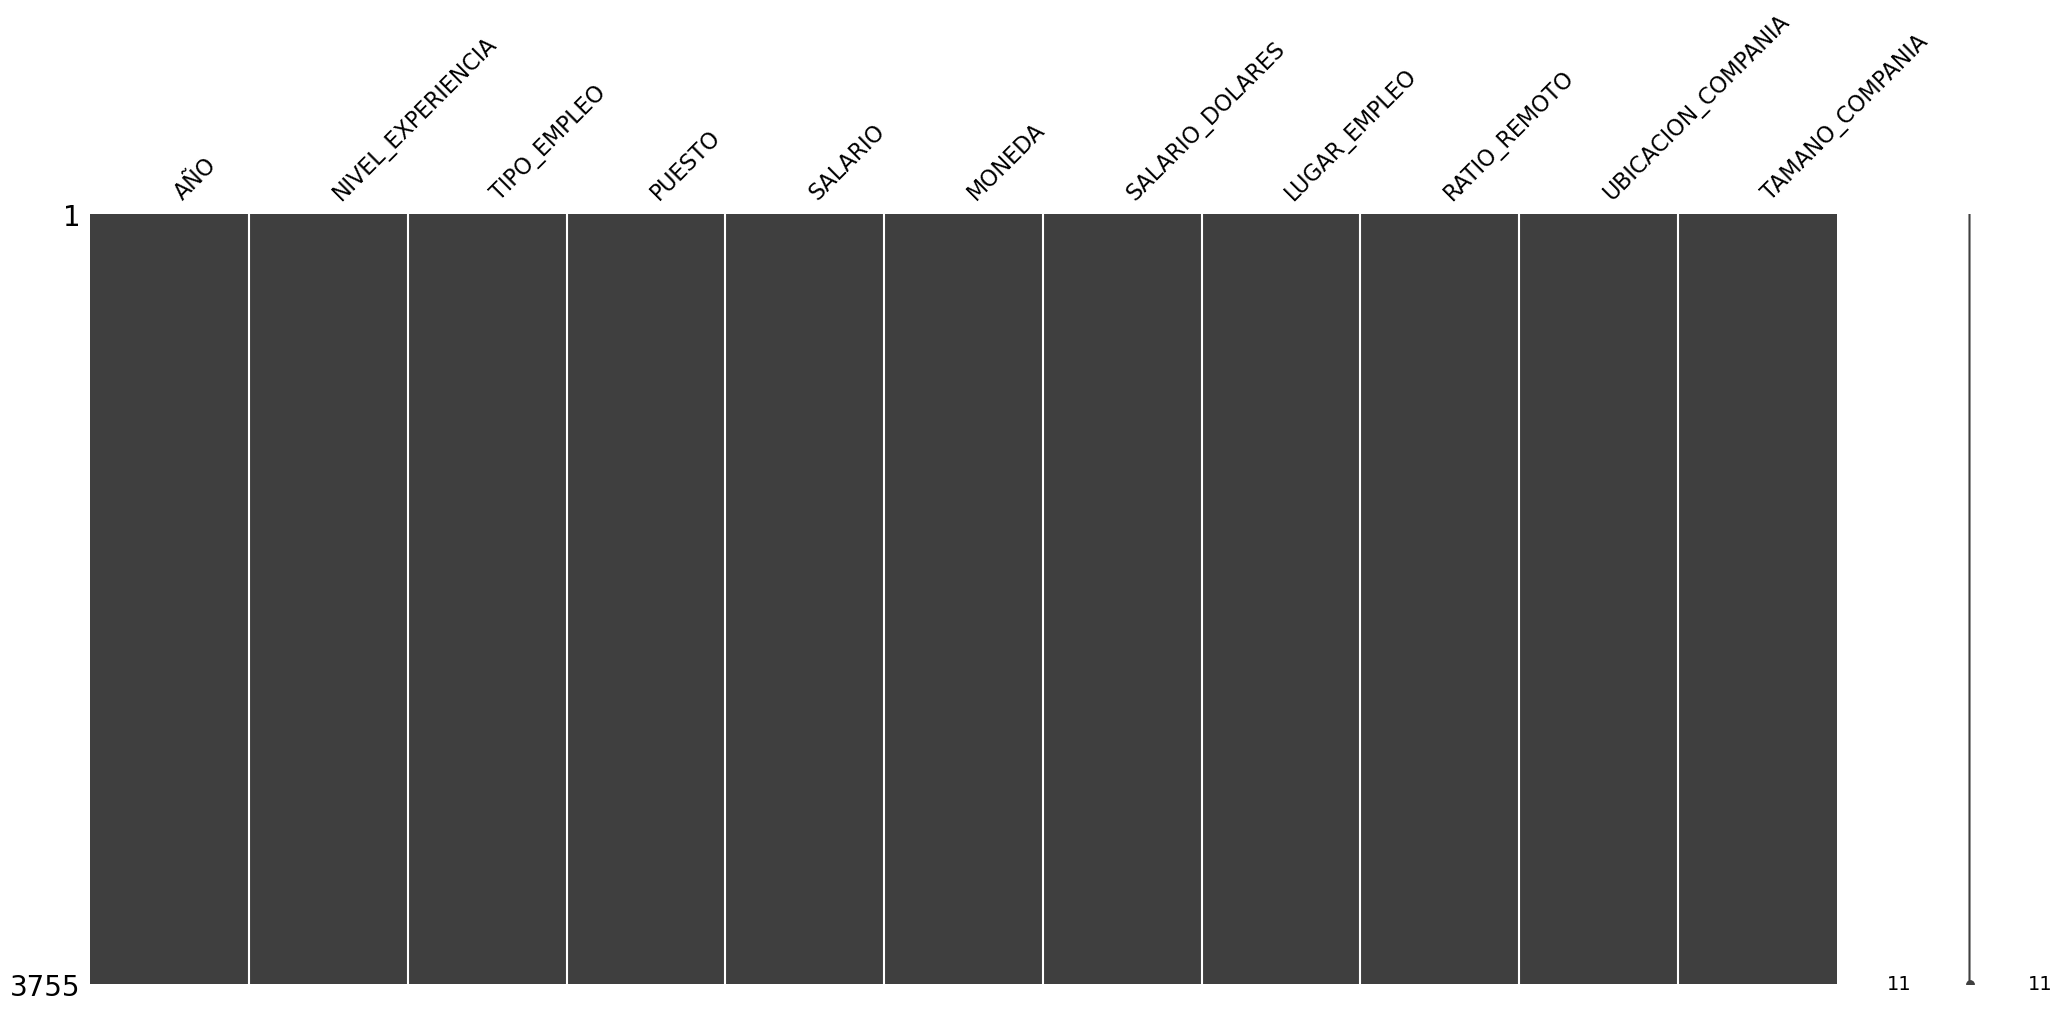

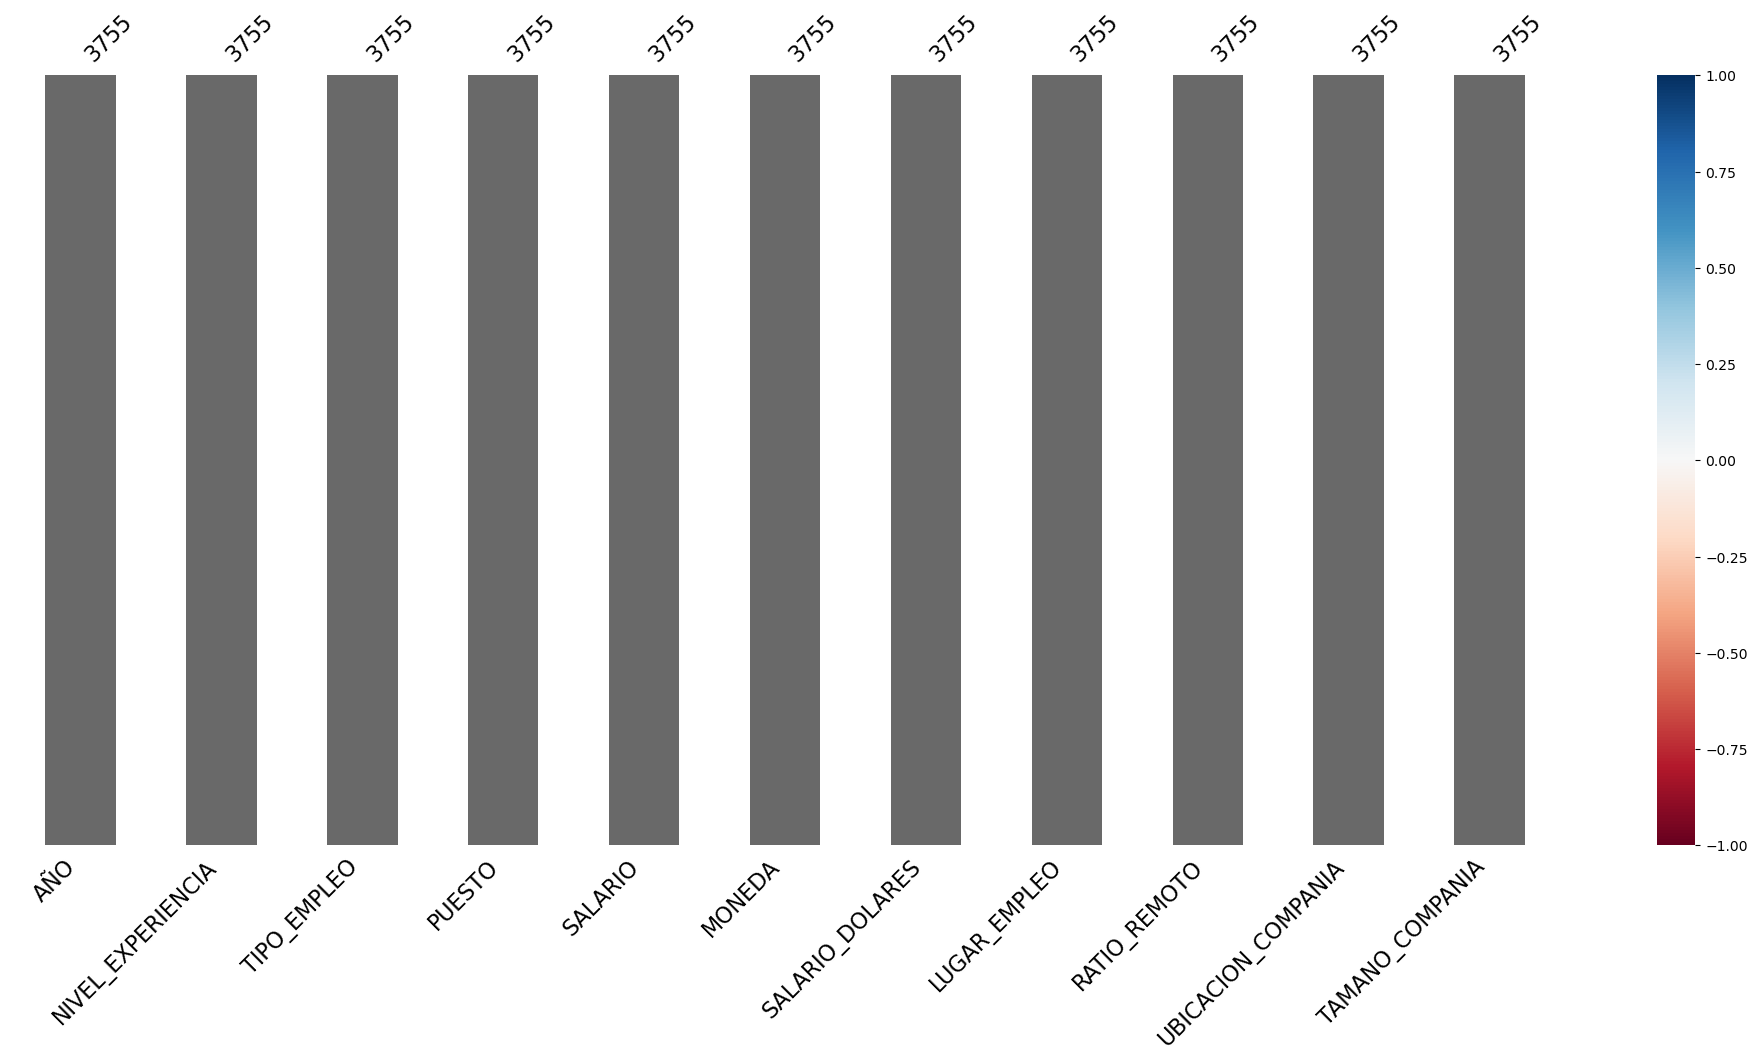

In [49]:
import missingno as msno

# Visualizar el patrón de valores perdidos en df1
msno.matrix(df1)
msno.heatmap(df1)
msno.bar(df1)

# DESAFÍO 3: VISUALIZACIÓN EFECTIVA Y DATA STORYTELLING

In [78]:
# Se importan las librerías necesarias para el trabajo con el Dataset de salarios
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import squarify

In [51]:
# Se realiza una copia del DS para poder trabajar tranquilos y no afectar directamente el DS original
DSsal = df1.copy()
DSsal

AÑO NIVEL_EXPERIENCIA TIPO_EMPLEO                    PUESTO  SALARIO  \
0     2023                SE          FT  Principal Data Scientist    80000   
1     2023                MI          CT               ML Engineer    30000   
2     2023                MI          CT               ML Engineer    25500   
3     2023                SE          FT            Data Scientist   175000   
4     2023                SE          FT            Data Scientist   120000   
...    ...               ...         ...                       ...      ...   
3750  2020                SE          FT            Data Scientist   412000   
3751  2021                MI          FT  Principal Data Scientist   151000   
3752  2020                EN          FT            Data Scientist   105000   
3753  2020                EN          CT     Business Data Analyst   100000   
3754  2021                SE          FT      Data Science Manager  7000000   

     MONEDA  SALARIO_DOLARES LUGAR_EMPLEO  RATIO_REMOTO UBICACION_COMPANIA  \
0       EUR            85847           ES           100                 ES   
1       USD            30000           US           100                 US   
2       USD            25500           US           100                 US   
3       USD           175000           CA           100                 CA   
4       USD           120000           CA           100                 CA   
...     ...              ...          ...           ...                ...   
3750    USD           412000           US           100                 US   
3751    USD           151000           US           100                 US   
3752    USD           105000           US           100                 US   
3753    USD           100000           US           100                 US   
3754    INR            94665           IN            50                 IN   

     TAMANO_COMPANIA  
0                  L  
1                  S  
2                  S  
3                  M  
4                  M  
...              ...  
3750               L  
3751               L  
3752               S  
3753               L  
3754               L  

[3755 rows x 11 columns]

In [53]:
# Conteo de los puestos de trabajo por tipo de rol asignado
puesto_counts = DSsal['PUESTO'].value_counts()
puesto_counts

PUESTO
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

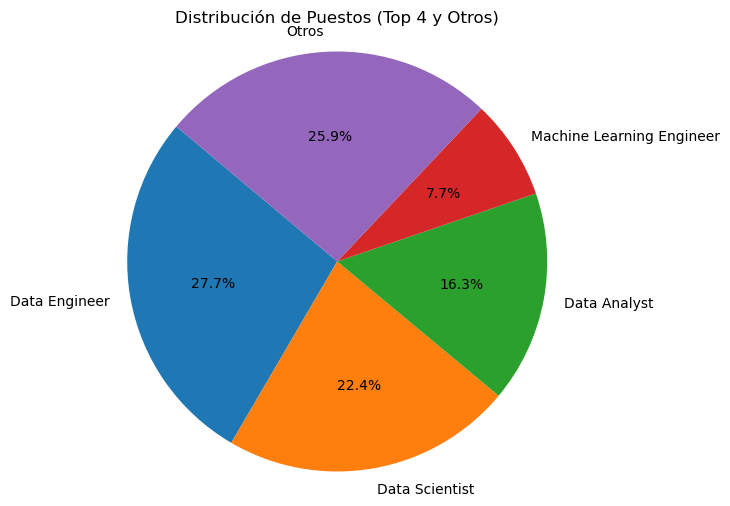

In [55]:
# Seleccionar los 4 puestos con mayor cantidad
top_4_puestos = puesto_counts.head(4)

# Agrupar el resto en la categoría 'Otros'
otros = puesto_counts[4:].sum()
top_4_puestos['Otros'] = otros

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(top_4_puestos, labels=top_4_puestos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Puestos (Top 4 y Otros)')
plt.axis('equal')
plt.show()

In [56]:
# Se cuentan la cantidad de puestos de trabajo en relación al país donde están ubicados
ubic_counts = DSsal['UBICACION_COMPANIA'].value_counts()
ubic_counts

UBICACION_COMPANIA
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

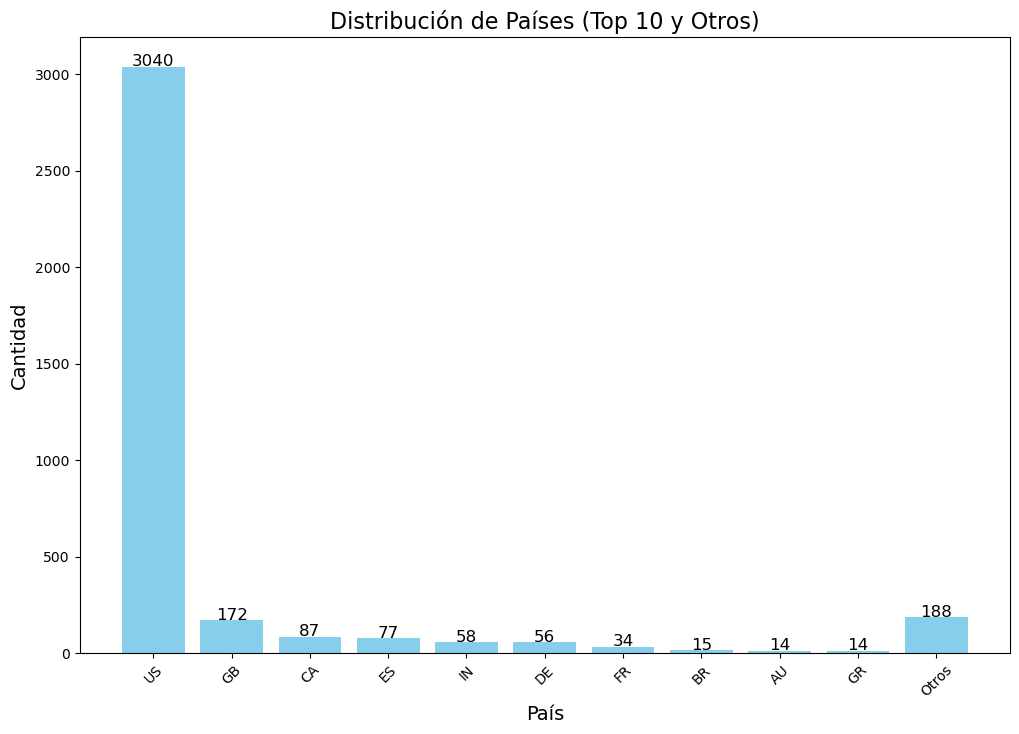

In [57]:
# Seleccionar los 10 países con mayor cantidad
top_10_paises = ubic_counts.head(10)

# Agrupar el resto en la categoría 'Otros'
otros = ubic_counts[10:].sum()
top_10_paises['Otros'] = otros

# Crear un DataFrame para el gráfico de barras apiladas
stacked_data = pd.DataFrame({'País': top_10_paises.index, 'Cantidad': top_10_paises.values})

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
plt.bar(stacked_data['País'], stacked_data['Cantidad'], color='skyblue')

# Añadir etiquetas y título
plt.title('Distribución de Países (Top 10 y Otros)', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Añadir los valores en las barras
for i in range(len(stacked_data)):
    plt.text(i, stacked_data['Cantidad'][i] + 2, f'{stacked_data["Cantidad"][i]}', ha='center', fontsize=12)

# Ajustar el eje x para mejorar la visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

¿Cuál es la tasa de cambio promedio de los salarios en dólares entre 2020 y 2023?

Gráfico 1: Línea de tendencia de salarios medios por año

    Descripción: Un gráfico de líneas que muestra la tendencia de los salarios promedio en dólares a lo largo de los años (2020-2023).
    Eje X: AÑO
    Eje Y: SALARIO_DOLARES (promedio)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8044\4236746283.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='AÑO', y='SALARIO_DOLARES', data=DSsal, estimator='mean', ci=None, marker='o')


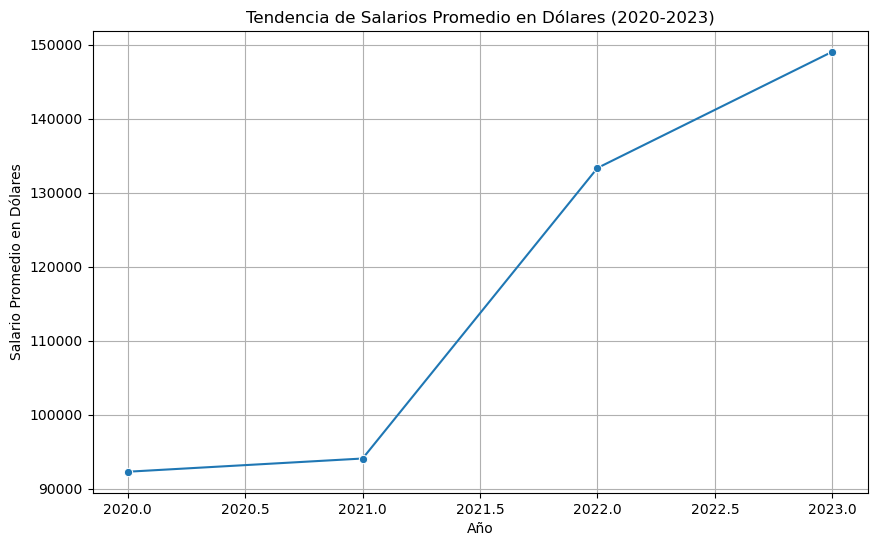

In [58]:
# Gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='SALARIO_DOLARES', data=DSsal, estimator='mean', ci=None, marker='o')
plt.title('Tendencia de Salarios Promedio en Dólares (2020-2023)')
plt.xlabel('Año')
plt.ylabel('Salario Promedio en Dólares')
plt.grid(True)
plt.show()

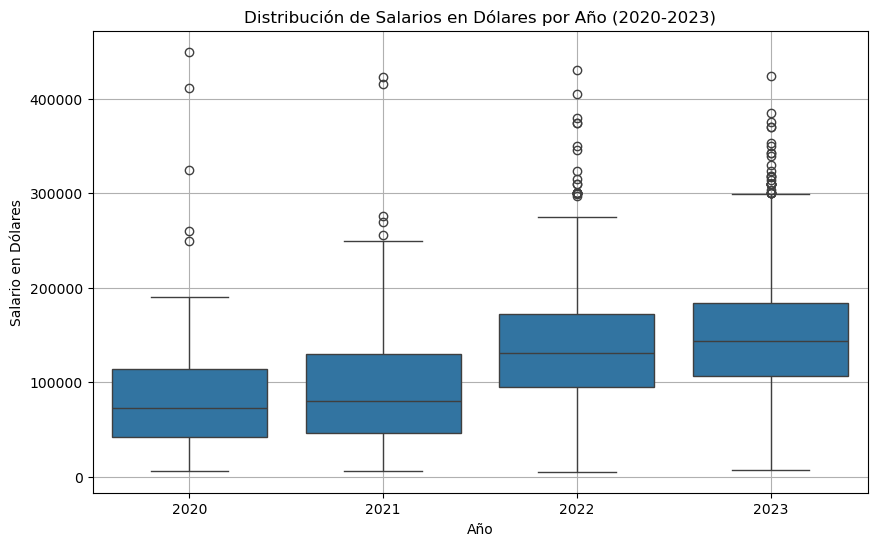

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AÑO', y='SALARIO_DOLARES', data=DSsal)
plt.title('Distribución de Salarios en Dólares por Año (2020-2023)')
plt.xlabel('Año')
plt.ylabel('Salario en Dólares')
plt.grid(True)
plt.show()

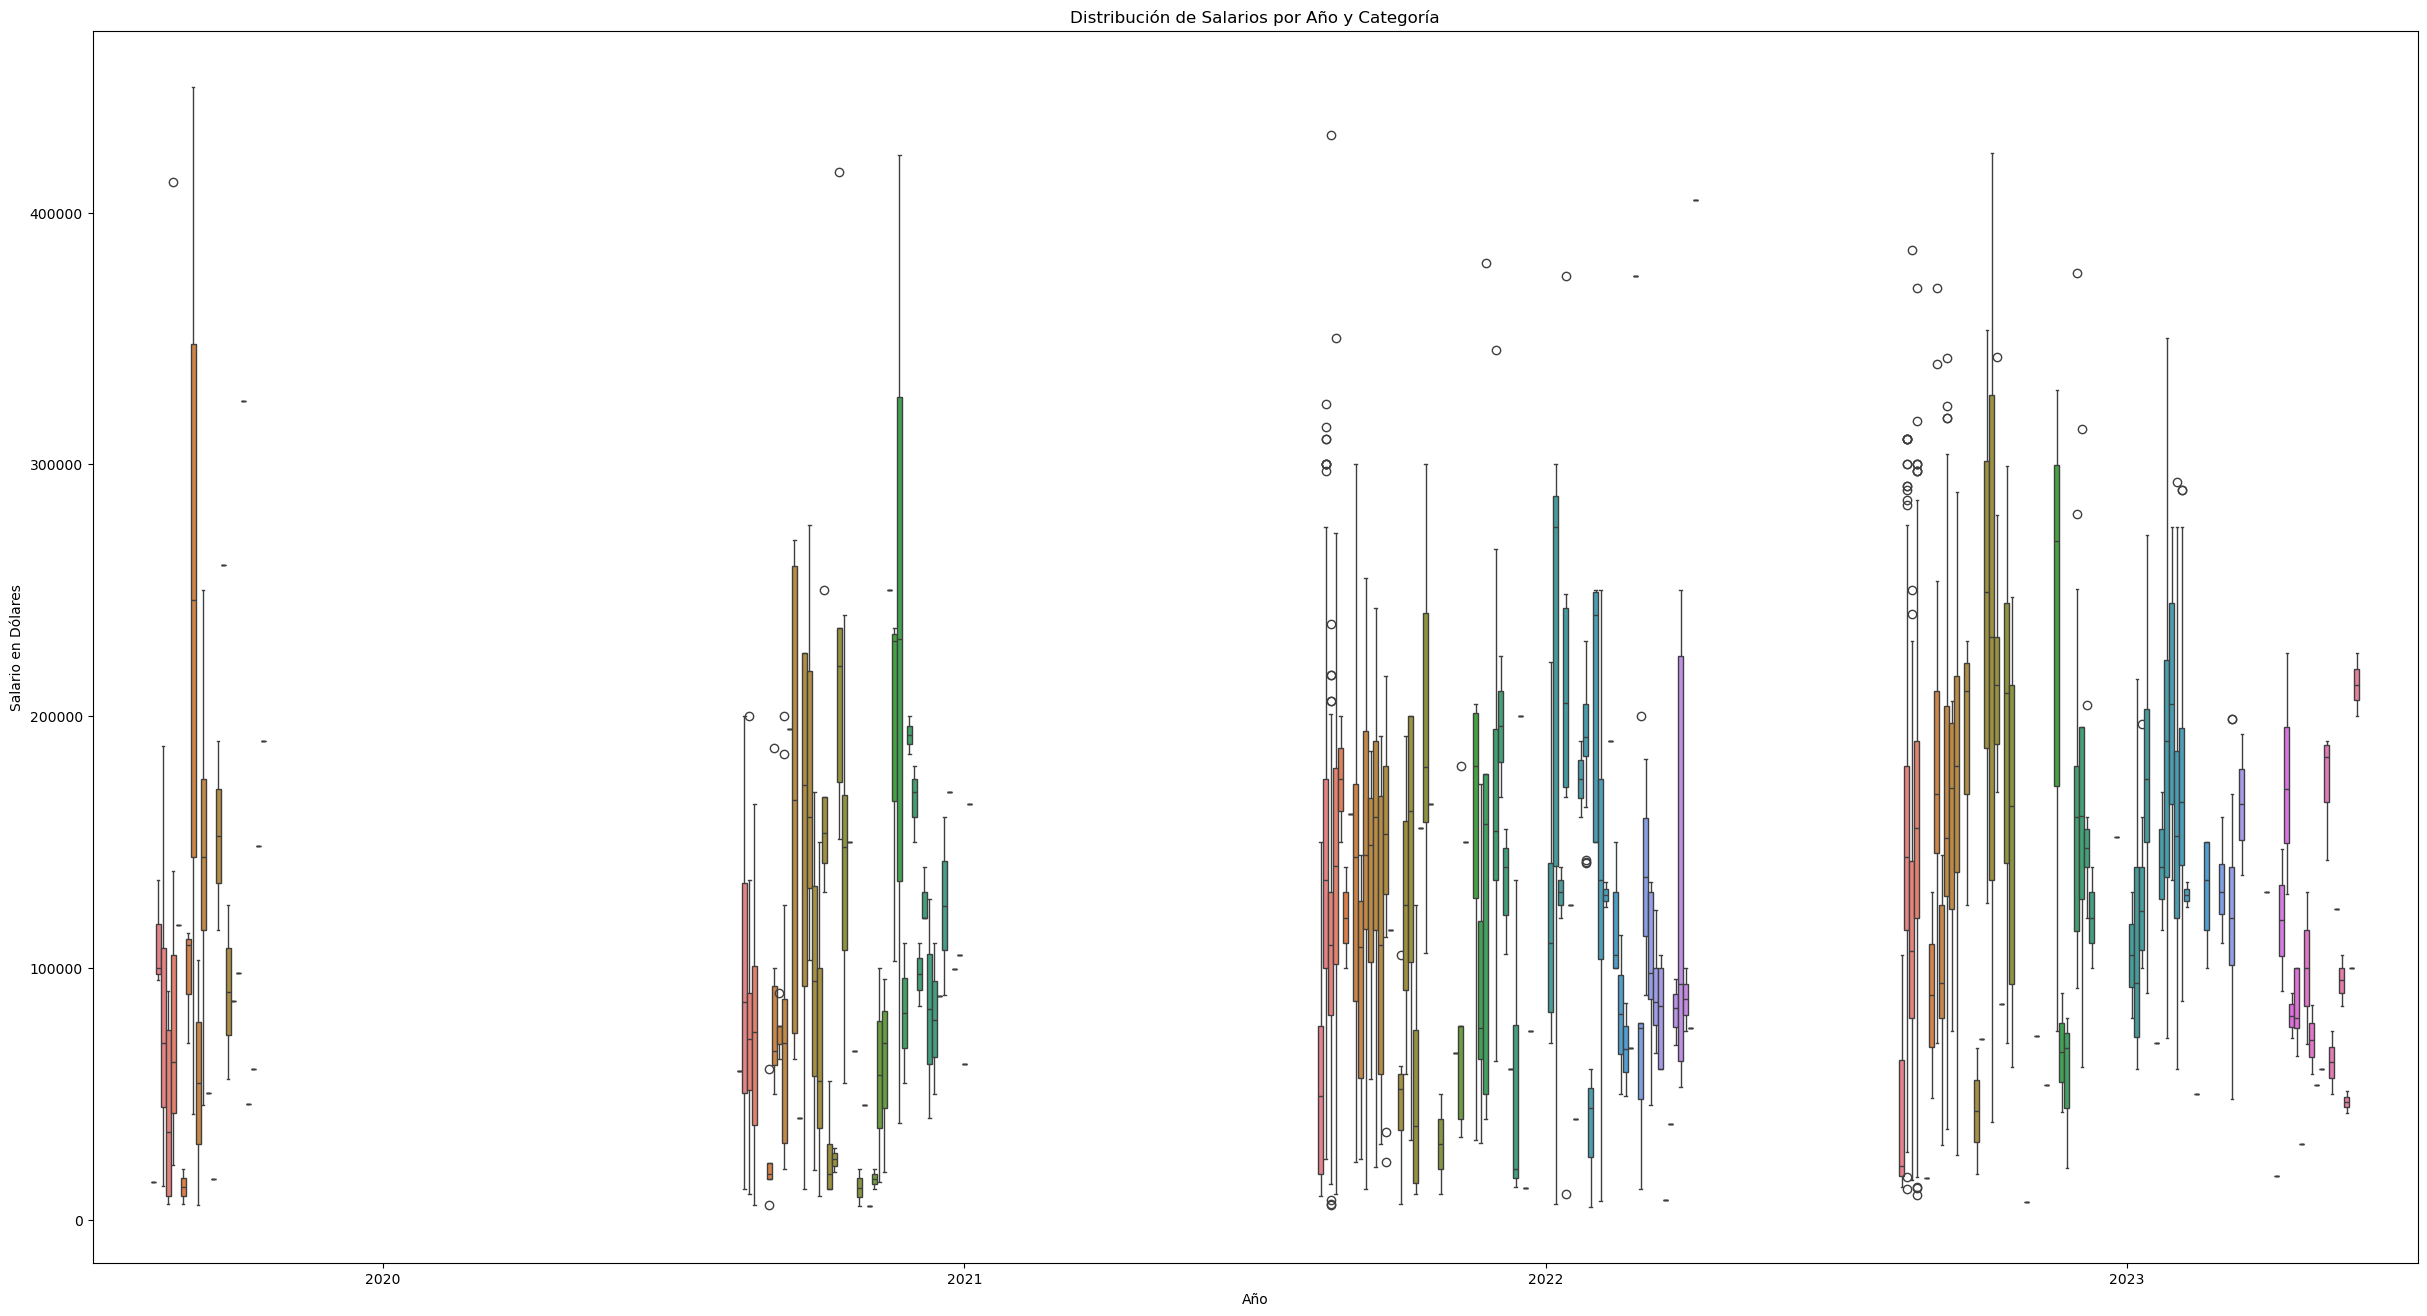

In [60]:
# Crear un boxplot que muestra los salarios por año
plt.figure(figsize=(30, 16))
ax = sns.boxplot(x="AÑO", y="SALARIO_DOLARES", hue="PUESTO", data=DSsal)
ax.set_title("Distribución de Salarios por Año y Categoría")
ax.set_xlabel("Año")
ax.set_ylabel("Salario en Dólares")

# Eliminar la leyenda
ax.get_legend().remove()

plt.show()

¿Existen diferencias significativas en la tendencia salarial entre niveles de experiencia (junior, intermedio, senior)?

Gráfico 1: Línea de tendencia de salarios medios por nivel de experiencia

    Descripción: Un gráfico de líneas que muestra la tendencia de los salarios promedio en dólares para cada nivel de experiencia a lo largo de los años.
    Eje X: AÑO
    Eje Y: SALARIO_DOLARES (promedio)
    Hue (color): NIVEL_EXPERIENCIA

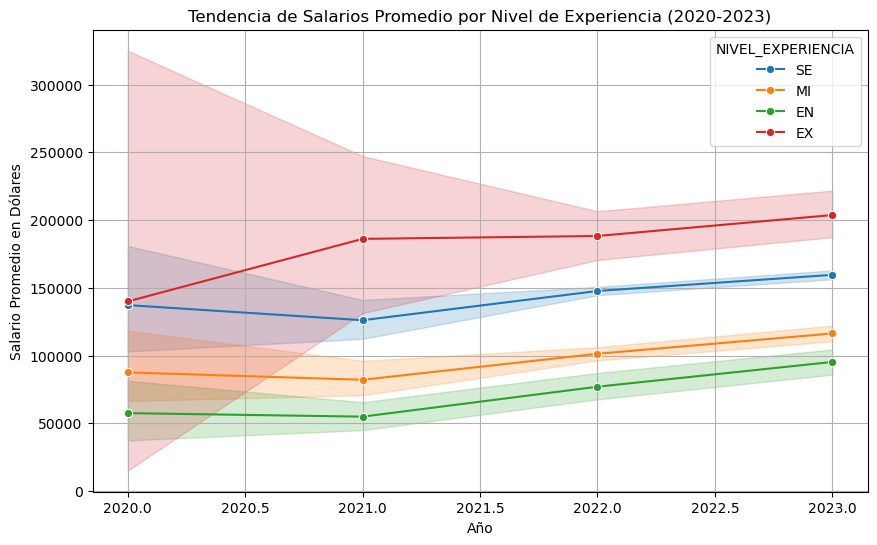

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='SALARIO_DOLARES', hue='NIVEL_EXPERIENCIA', data=DSsal, estimator='mean', marker='o')
plt.title('Tendencia de Salarios Promedio por Nivel de Experiencia (2020-2023)')
plt.xlabel('Año')
plt.ylabel('Salario Promedio en Dólares')
plt.grid(True)
plt.show()

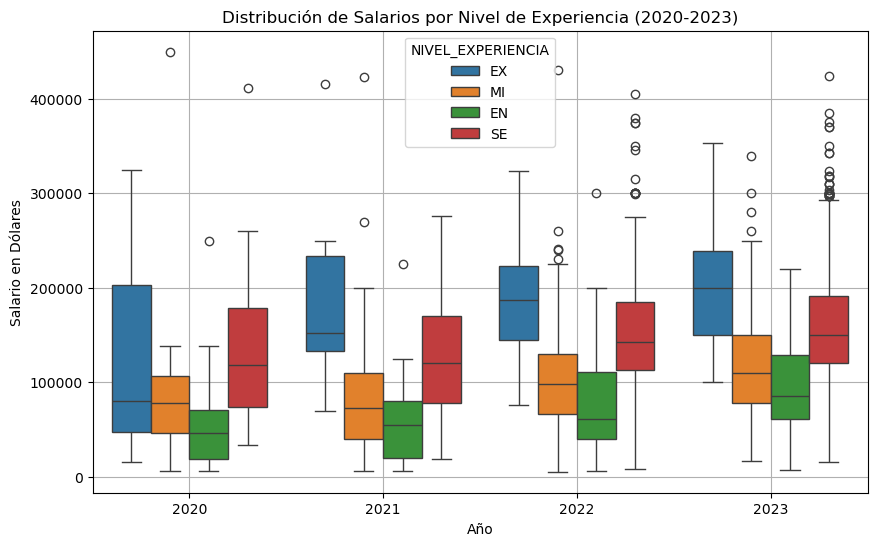

In [63]:
# Distribución de salarios a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.boxplot(data=DSsal, x='AÑO', y='SALARIO_DOLARES', hue='NIVEL_EXPERIENCIA')
plt.title('Distribución de Salarios por Nivel de Experiencia (2020-2023)')
plt.xlabel('Año')
plt.ylabel('Salario en Dólares')
plt.grid(True)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8044\2004718908.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df_sorted, x='PUESTO', y='SALARIO_DOLARES', palette='viridis')


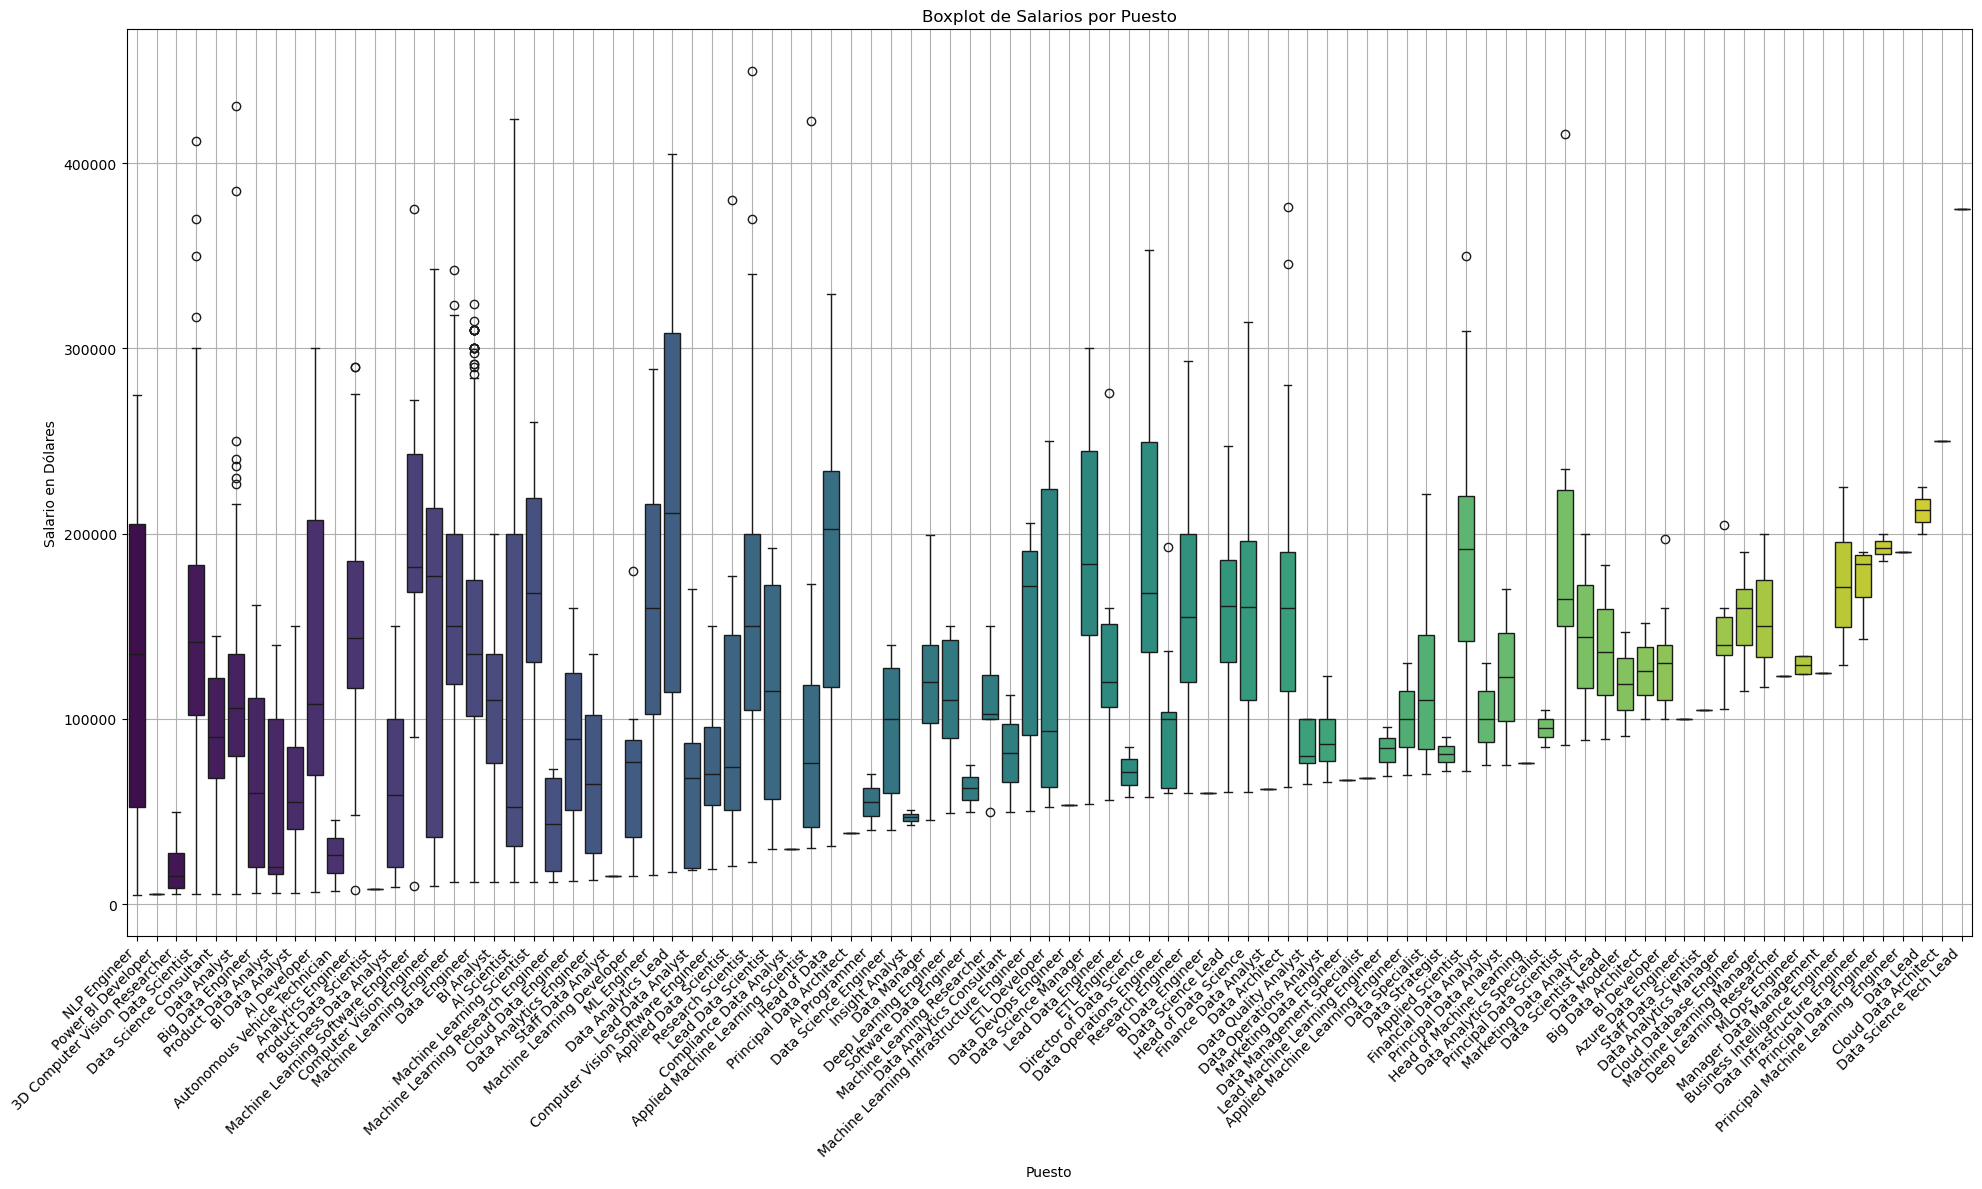

In [64]:
# Crear un nuevo DataFrame con las columnas necesarias
DSsalarios = DSsal[['PUESTO', 'SALARIO_DOLARES']]

# Ordenar el DataFrame por 'SALARIO_DOLARES' de menor a mayor
new_df_sorted = DSsalarios.sort_values(by='SALARIO_DOLARES')

# Graficar el boxplot usando seaborn
plt.figure(figsize=(20, 12))
sns.boxplot(data=new_df_sorted, x='PUESTO', y='SALARIO_DOLARES', palette='viridis')

# Ajustar etiquetas y espaciado
plt.title('Boxplot de Salarios por Puesto')
plt.xlabel('Puesto')
plt.ylabel('Salario en Dólares')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas y alinear a la derecha
plt.tight_layout()  # Ajusta el espaciado automáticamente

# Mostrar el gráfico
plt.grid(True)

plt.show()

¿Cómo ha impactado el aumento del trabajo remoto (RATIO_REMOTO) en los salarios a lo largo del tiempo?

Gráfico 1: Línea de tendencia de salarios medios por ratio de trabajo remoto

    Descripción: Un gráfico de líneas que muestra la tendencia de los salarios promedio en dólares a lo largo de los años, diferenciando por el ratio de trabajo remoto.
    Eje X: AÑO
    Eje Y: SALARIO_DOLARES (promedio)
    Hue (color): RATIO_REMOTO

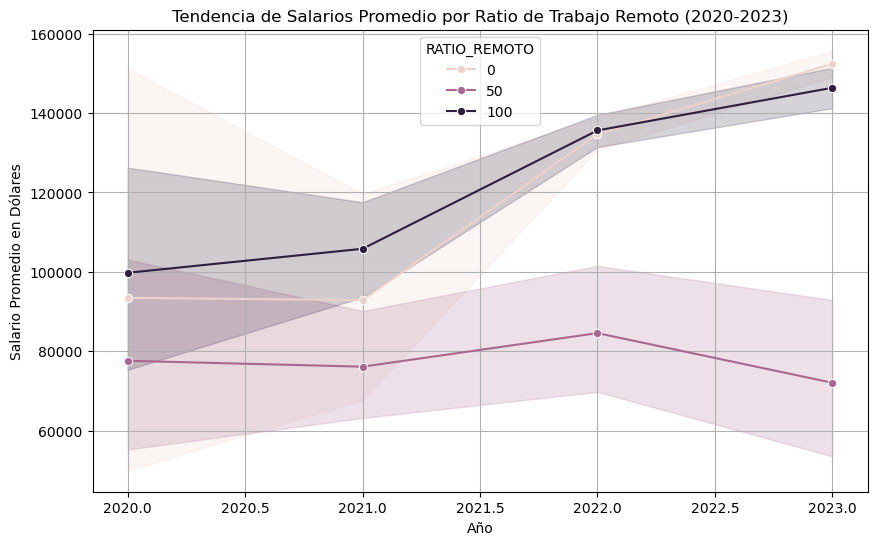

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='SALARIO_DOLARES', hue='RATIO_REMOTO', data=DSsal, estimator='mean', marker='o')
plt.title('Tendencia de Salarios Promedio por Ratio de Trabajo Remoto (2020-2023)')
plt.xlabel('Año')
plt.ylabel('Salario Promedio en Dólares')
plt.grid(True)
plt.show()

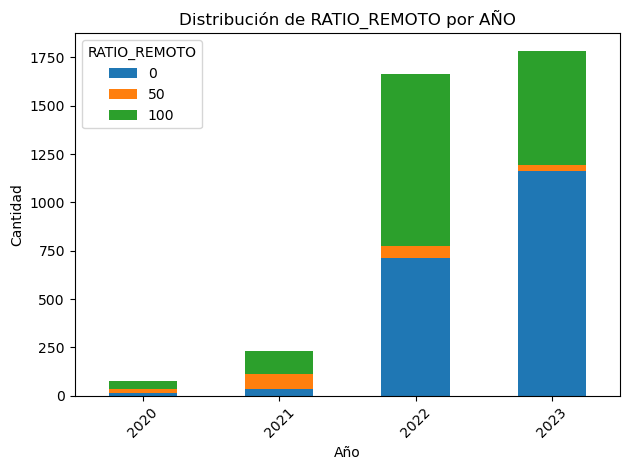

In [66]:
counts = DSsal.groupby(['AÑO', 'RATIO_REMOTO']).size().unstack().fillna(0)

# Gráfica apilada de barras con Seaborn
counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribución de RATIO_REMOTO por AÑO')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='RATIO_REMOTO')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Hay alguna relación entre la ubicación de la compañía y la tendencia de salarios en dólares?

Gráfico 1: Boxplot de salarios por ubicación de la compañía y año

    Descripción: Un boxplot que muestra la distribución de los salarios en dólares para cada ubicación de la compañía en cada año.
    Eje X: UBICACION_COMPANIA
    Eje Y: SALARIO_DOLARES
    Columna adicional (facet): AÑO

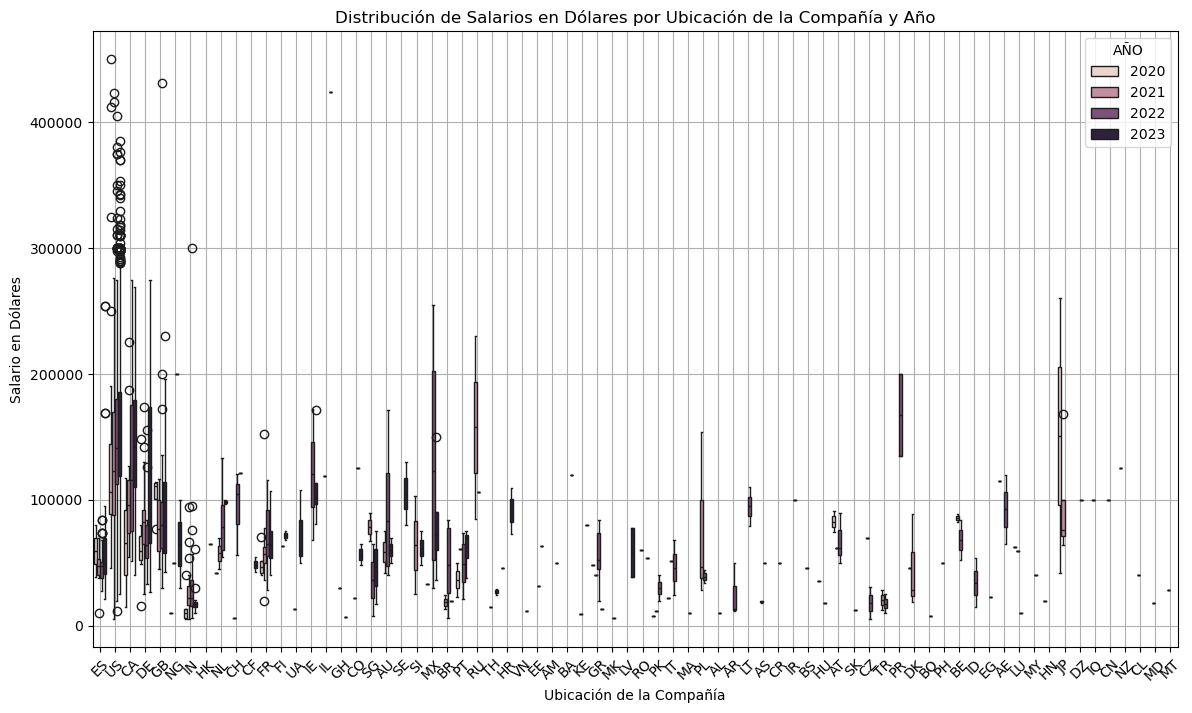

In [67]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='UBICACION_COMPANIA', y='SALARIO_DOLARES', hue='AÑO', data=DSsal)
plt.title('Distribución de Salarios en Dólares por Ubicación de la Compañía y Año')
plt.xlabel('Ubicación de la Compañía')
plt.ylabel('Salario en Dólares')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

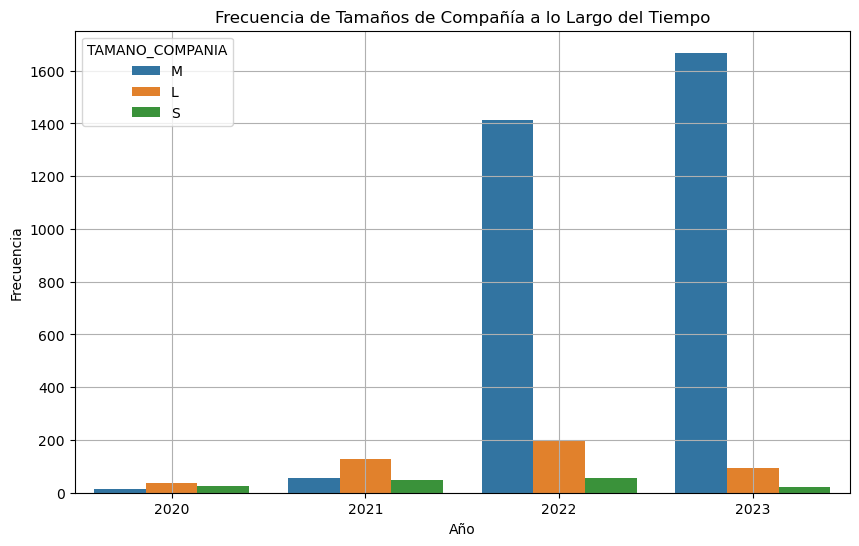

In [69]:
# Crear un gráfico de barras para analizar la frecuencia de los tamaños de compañía por año
plt.figure(figsize=(10, 6))
sns.countplot(data=DSsal, x='AÑO', hue='TAMANO_COMPANIA')
plt.title('Frecuencia de Tamaños de Compañía a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Gráfico de barras apiladas de salarios por nivel de experiencia y año

    Descripción: Un gráfico de barras apiladas que muestra la contribución de cada nivel de experiencia a los salarios totales en dólares para cada año.
    Eje X: AÑO
    Eje Y: SALARIO_DOLARES (suma)
    Hue (color): NIVEL_EXPERIENCIA

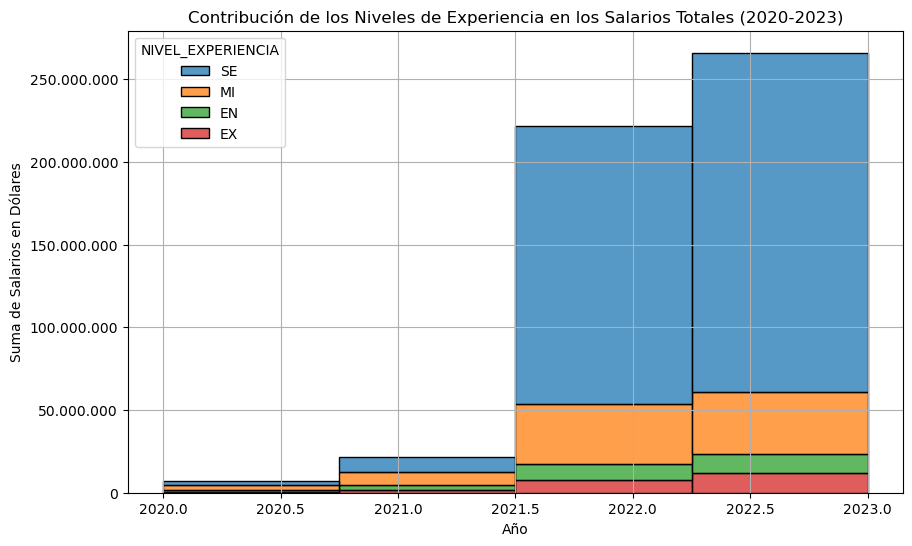

In [70]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Función para formatear los números y evitar notación científica
def format_number(x, pos):
    return f'{int(x):,}'.replace(",", ".")

plt.figure(figsize=(10, 6))
sns.histplot(data=DSsal, x='AÑO', weights=DSsal['SALARIO_DOLARES'], hue='NIVEL_EXPERIENCIA', multiple='stack', bins=4)
plt.title('Contribución de los Niveles de Experiencia en los Salarios Totales (2020-2023)')
plt.xlabel('Año')
plt.ylabel('Suma de Salarios en Dólares')

# Aplicar el formateador de números completos
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

plt.grid(True)
plt.show()

# PRIMERA PRE ENTREGA PROYECTO FINAL

***ABSTRACT - CONTEXTO COMERCIAL***

Hace unos pocos años atrás nos vimos inmiscuidos en uno de los mayores desafíos de salud a nivel mundial donde todos hemos sido afectados en menor o mayor manera por la pandemia producida por COVID-19. Este fenómeno ha producido consecuencias negativas que no conciernen al presente trabajo pero así también muchas otras muy positivas en otros muchos rubros. Plataformas de comunicación han mejorado forzada pero increíblemente bien para poder comunicarnos mejor y a la vez hemos tenido que acostumbrarnos a usar estos medios para no solamente hablar con familiares o amigos, sino también por cuestiones laborales. Muchos trabajos han mutado su asistencia de presencial a remoto como así también a nivel académico, ha sucedido lo mismo. En fin, los ejemplos son interminables, pero lo que podemos encontrar como factor común es el hecho de que el mundo cibernético, virtual, o como querramos llamarle, también ha visto un impulso de crecimiento exponencial. El mundo del Data Science no ha sido la excepción y el presente proyecto pretende vislumbrar un poco más en concreto que ha pasado en el rubro luego de aquel estallido tecnológico impulsado por la pandemia, como se encuentra hoy y qué podríamos concluir que sucederá por lo menos en los próximos años.

***PROBLEMA COMERCIAL***

Una empresa consultora económica ( ficticia ) desea saber como se comportará el mercado laboral y salarial en el rubro del Data Science, con los datos que ha podido recolectar en los años de y post pandemia para analizar el comportamiento salarial y de puestos de trabajo, para así brindar una estimación de tendencia para los próximos 2 años ( 2024-2025). Con dichos resultados pretende afectar los recursos presupuestarios para el área de RRHH, para nuevas contrataciones y ofrecer un paquete salarial acorde al mercado y a las tendencias salariales en el rubro.

***OBJETIVO***

El proyecto pretende analizar el comportamiento de los salarios entre los años 2020 - 2023, en relación a los datos contenidos en la base de datos obtenida. 

El Dataset en este caso se obtuvo de la página  Kaggle de la cual se deja a continuación el link directo de acceso a ella para el lector que desee consultarla desde su fuente base: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

A modo de resumen el data set está constituido de la siguiente manera:

Consta de 11 columnas, las cuales son:

1 - work_year: The year the salary was paid ( 2020 - 2023 ).

2 - experience_level: The experience level in the job during the year

3 - employment_type: The type of employment for the role

4 - job_title: The role worked in during the year.

5 - salary: The total gross salary amount paid.

6 - salary_currency: The currency of the salary paid as an ISO 4217 currency code.

7 - salaryinusd: The salary in USD

8 - employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

9 - remote_ratio: The overall amount of work done remotely

10 - company_location: The country of the employer's main office or contracting branch

11 - company_size: The median number of people that worked for the company during the year

***CONTEXTO ANALÍTICO - MÉTODO***

El método que utilizaremos para resolver el problema de la consultora, es el de **Preba de Hipótesis**

El primer paso es definir la hipótesis nula (a menudo indicada como $H_0$). Para nosotros, la hipótesis nula **siempre** corresponderá a la hipótesis de no cambio; es decir, el statu quo sigue siendo válido. Formalmente, esto se escribe como: $H_0:\mu=\mu_0$.

En nuestro caso, $H_0$ sería equivalente a plantear que el salario de los diferentes puestos de trabajo tiene una tendencia en descenso a lo largo del tiempo, ya que el `` boom ´´ generado por la pandemia ya ha cesado. Con lo cual $\mu$ es mayor o igual que el de los años anteriores, o $\mu_0$. Deseamos probar si $H_0$ es incorrecto; es decir, si $\mu$ es mayor o igual de $\mu_0$.

#### Hipótesis alternativa

En oposición con la hipótesis nula, podemos definir dos hipótesis alternativas, para cambiar el status quo. Estas son:

1. $H_a: \mu \neq \mu_0$

2. $H_a: \mu > \mu_0$

La prueba estadística nos ayudará a decidir si hay suficiente evidencia para rechazar la hipótesis nula a favor de una alternativa.

#### Realización de una prueba de hipótesis

Hay dos resultados posibles para esta prueba: (1)Concluimos que $H_0$ es falso y decimos que **rechazamos $H_0$**. En este caso concluiremos que existe evidencia estadística para la alternativa $H_a$ y que los salarios tienen una tendencia de igualdad ( rompiendo así al tendencia decreciente de la hipótesis nula ), o incluso totalmente diferente, o sea alcista. O (2) **no rechazamos $H_0$**. En este caso, concluimos que no hay suficiente evidencia estadística para decir con certeza que $H_0$ es falso. **Esto último dicho en otras palabras nos ayuda a no poder negar la hipótesis nula. En nuestro caso que declara una tendencia en descenso de los salarios a lo largo de los años.**

***PREGUNTAS DE INTERÉS***

¿ Cuáles son las posiciones o puestos de trabajo con mejores salarios a lo largo de los 4 años de análisis ?

¿ Cuáles son los salarios más altos, relacionados con los puestos de trabajo a lo largo del período de tiempo del dataset ?

¿ Cuáles son los países donde se concentran la mayor cantidad de puestos de trabajo ?

¿ Cuál es la condición de trabajo más utilizada y cómo fue cambiando a lo largo de los años luego de la pandemia en relación al trabajo Remoto ?

¿ Hay alguna relación entre la ubicación de la compañía y la tendencia de salarios en dólares ?

¿ Cómo ha impactado el aumento del trabajo remoto (RATIO_REMOTO) en los salarios a lo largo del tiempo ?

In [77]:

# Definir las columnas de tipo object para aplicar Label Encoding
columns_to_encode = df1.select_dtypes(include=['object']).columns

# Crear una copia del DataFrame para no modificar el original
df_encoded = df1.copy()

# Aplicar Label Encoding solo a las columnas de tipo object
for col in columns_to_encode:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Calcular y mostrar la matriz de correlación incluyendo todas las columnas
correlation_matrix = df_encoded.corr()
correlation_matrix

AÑO  NIVEL_EXPERIENCIA  TIPO_EMPLEO    PUESTO  \
AÑO                 1.000000           0.187748     0.011127 -0.026862   
NIVEL_EXPERIENCIA   0.187748           1.000000    -0.032794  0.020026   
TIPO_EMPLEO         0.011127          -0.032794     1.000000 -0.052231   
PUESTO             -0.026862           0.020026    -0.052231  1.000000   
SALARIO            -0.094724          -0.024884    -0.003908  0.039065   
MONEDA              0.254548           0.225464    -0.048446 -0.057072   
SALARIO_DOLARES     0.228290           0.327173    -0.010329  0.120875   
LUGAR_EMPLEO        0.243475           0.251325    -0.024582 -0.063911   
RATIO_REMOTO       -0.236430          -0.054025    -0.028673 -0.042451   
UBICACION_COMPANIA  0.234661           0.250591    -0.013963 -0.073549   
TAMANO_COMPANIA     0.138875           0.066414    -0.041001  0.002548   

                     SALARIO    MONEDA  SALARIO_DOLARES  LUGAR_EMPLEO  \
AÑO                -0.094724  0.254548         0.228290      0.243475   
NIVEL_EXPERIENCIA  -0.024884  0.225464         0.327173      0.251325   
TIPO_EMPLEO        -0.003908 -0.048446        -0.010329     -0.024582   
PUESTO              0.039065 -0.057072         0.120875     -0.063911   
SALARIO             1.000000 -0.091121        -0.023676     -0.087176   
MONEDA             -0.091121  1.000000         0.430450      0.755836   
SALARIO_DOLARES    -0.023676  0.430450         1.000000      0.414039   
LUGAR_EMPLEO       -0.087176  0.755836         0.414039      1.000000   
RATIO_REMOTO        0.028731 -0.046644        -0.064171     -0.083142   
UBICACION_COMPANIA -0.072774  0.764744         0.405183      0.945676   
TAMANO_COMPANIA    -0.100352  0.102738        -0.000372      0.032168   

                    RATIO_REMOTO  UBICACION_COMPANIA  TAMANO_COMPANIA  
AÑO                    -0.236430            0.234661         0.138875  
NIVEL_EXPERIENCIA      -0.054025            0.250591         0.066414  
TIPO_EMPLEO            -0.028673           -0.013963        -0.041001  
PUESTO                 -0.042451           -0.073549         0.002548  
SALARIO                 0.028731           -0.072774        -0.100352  
MONEDA                 -0.046644            0.764744         0.102738  
SALARIO_DOLARES        -0.064171            0.405183        -0.000372  
LUGAR_EMPLEO           -0.083142            0.945676         0.032168  
RATIO_REMOTO            1.000000           -0.071574        -0.036928  
UBICACION_COMPANIA     -0.071574            1.000000         0.041703  
TAMANO_COMPANIA        -0.036928            0.041703         1.000000

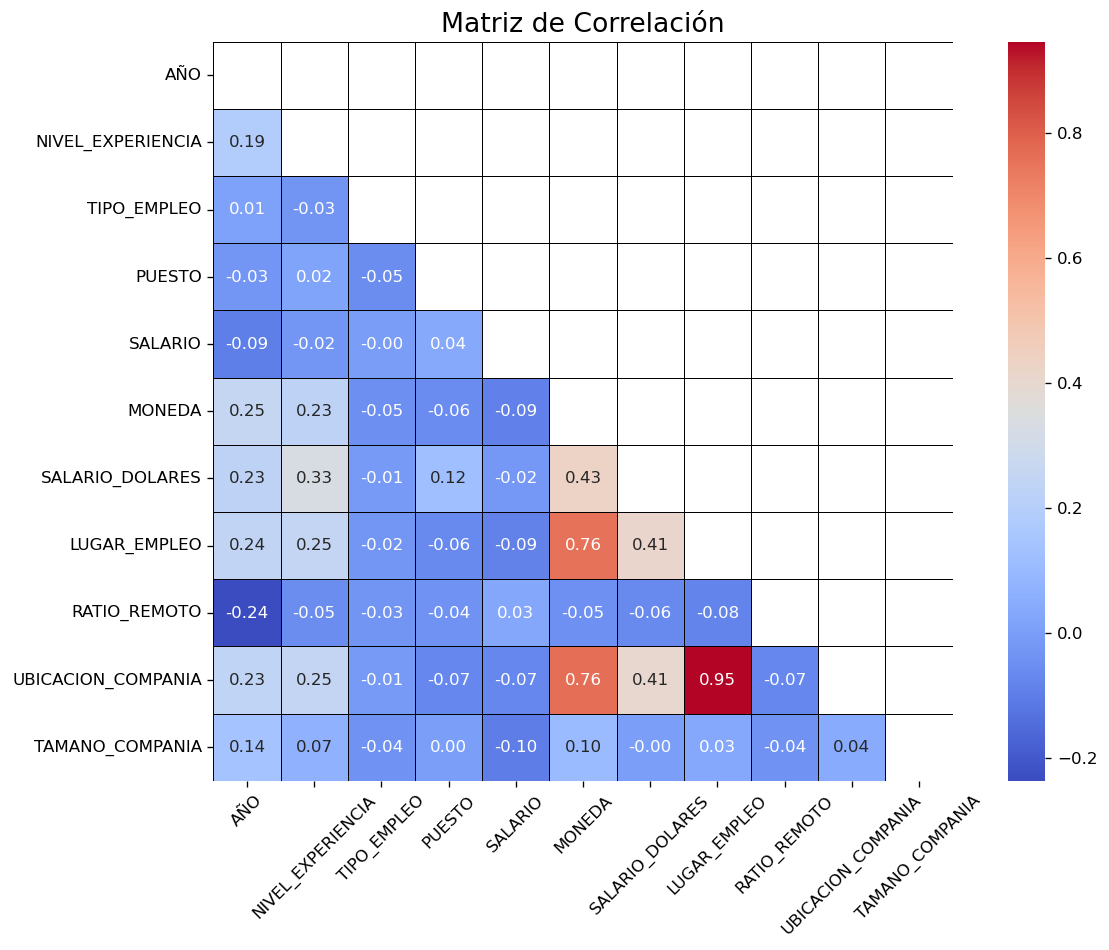

In [72]:
# Configuración del tamaño del gráfico
plt.figure(dpi=120, figsize=(12, 8))

# Crear la máscara para ocultar la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar=True, linewidths=.5, linecolor='black')

# Configurar títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Joint plot de SALARIO_DOLARES con otras variables ==> 

Correlacion entre SALARIO_DOLARES y AÑO ==>  0.22829002243291174


<Figure size 500x400 with 0 Axes>

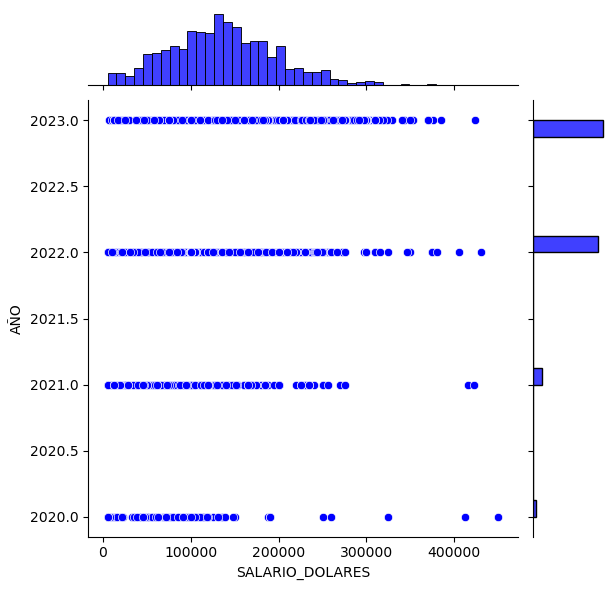

Correlacion entre SALARIO_DOLARES y NIVEL_EXPERIENCIA ==>  0.32717275721326383


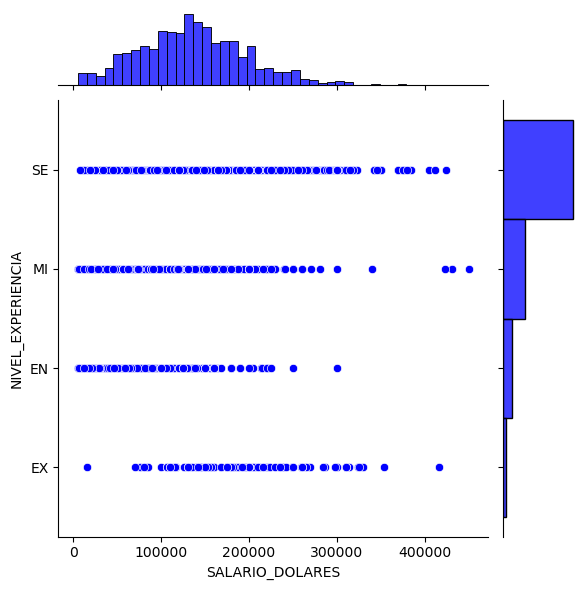

Correlacion entre SALARIO_DOLARES y TIPO_EMPLEO ==>  -0.010328990568081163


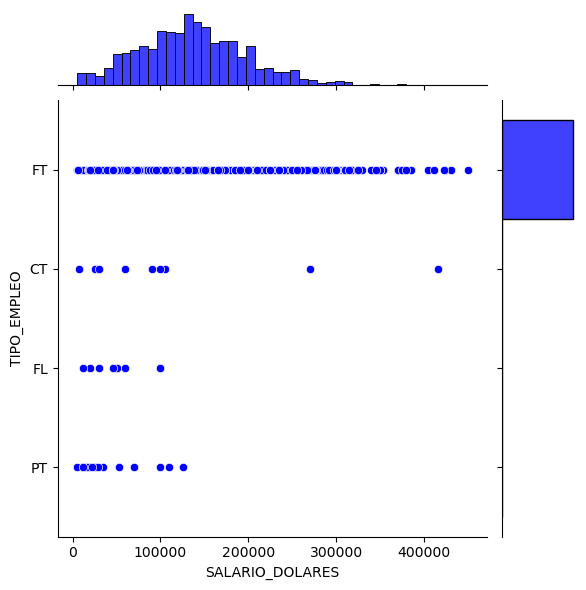

Correlacion entre SALARIO_DOLARES y PUESTO ==>  0.12087494588537936


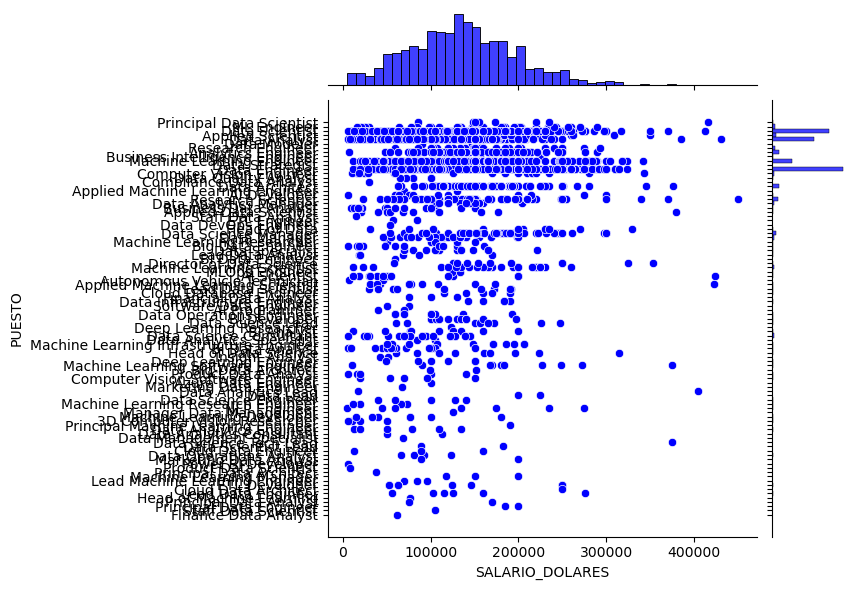

Correlacion entre SALARIO_DOLARES y SALARIO ==>  -0.02367581398124942


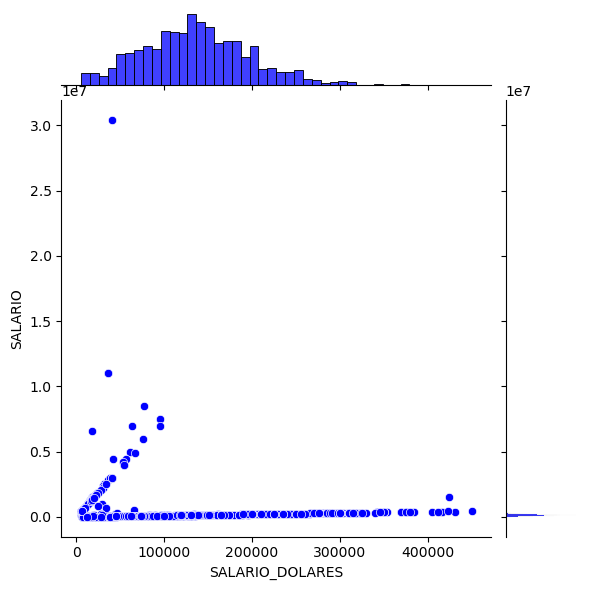

Correlacion entre SALARIO_DOLARES y MONEDA ==>  0.43044969528114907


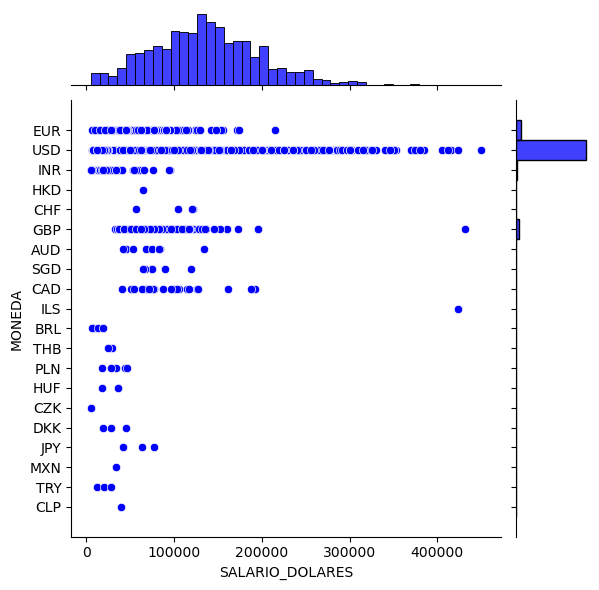

Correlacion entre SALARIO_DOLARES y LUGAR_EMPLEO ==>  0.41403852153660486


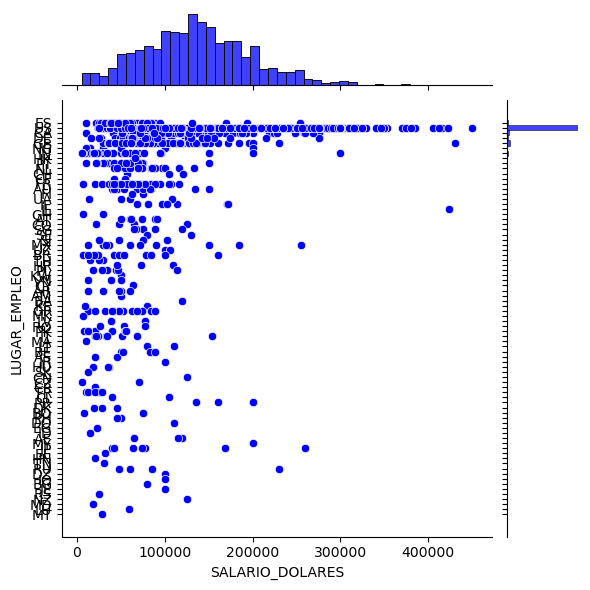

Correlacion entre SALARIO_DOLARES y RATIO_REMOTO ==>  -0.06417098519057579


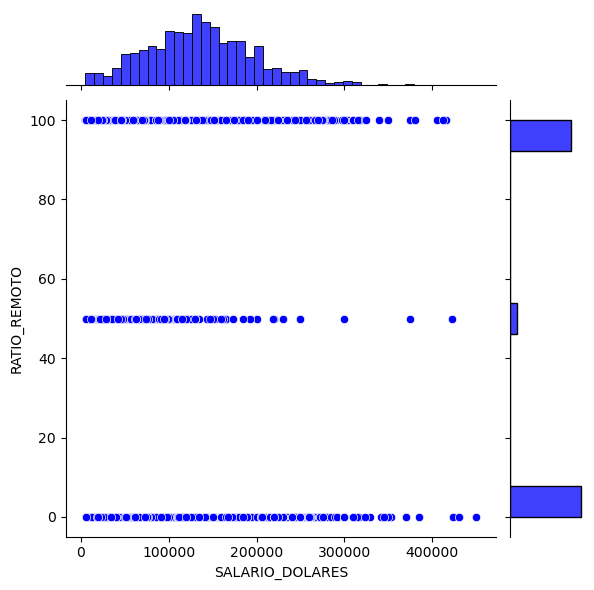

Correlacion entre SALARIO_DOLARES y TAMANO_COMPANIA ==>  -0.00037235908883341524


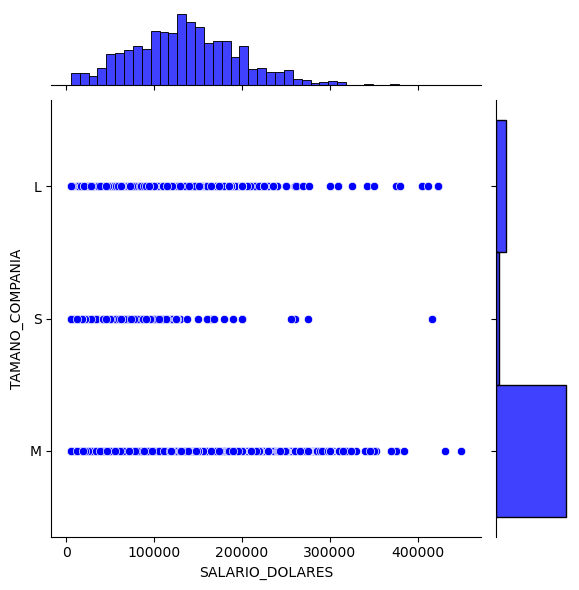

In [73]:
# Comparación de variables
plt.figure(dpi=100, figsize=(5, 4))
print("Joint plot de SALARIO_DOLARES con otras variables ==> \n")

# Iterar sobre las columnas del DataFrame
for i in DSsal.columns:
    if i != 'SALARIO_DOLARES' and i != 'UBICACION_COMPANIA' and i != 'SALARIO_CATEGORIA':
        # Verificar si la columna está en la matriz de correlación
        if i in correlation_matrix.columns:
            # Imprimir la correlación entre SALARIO_DOLARES y cada variable desde la matriz de correlación
            print(f"Correlacion entre SALARIO_DOLARES y {i} ==> ", correlation_matrix.loc['SALARIO_DOLARES'][i])
            
            # Crear el JointPlot en color azul
            sns.jointplot(x='SALARIO_DOLARES', y=i, data=DSsal, kind='scatter', color='blue')
            plt.show()
        else:
            print(f"Columna {i} no encontrada en la matriz de correlación.")

Joint plots de SALARIO_DOLARES con LUGAR_EMPLEO y PUESTO ==> 

Correlacion entre SALARIO_DOLARES y LUGAR_EMPLEO ==>  0.41403852153660486


<Figure size 1000x800 with 0 Axes>

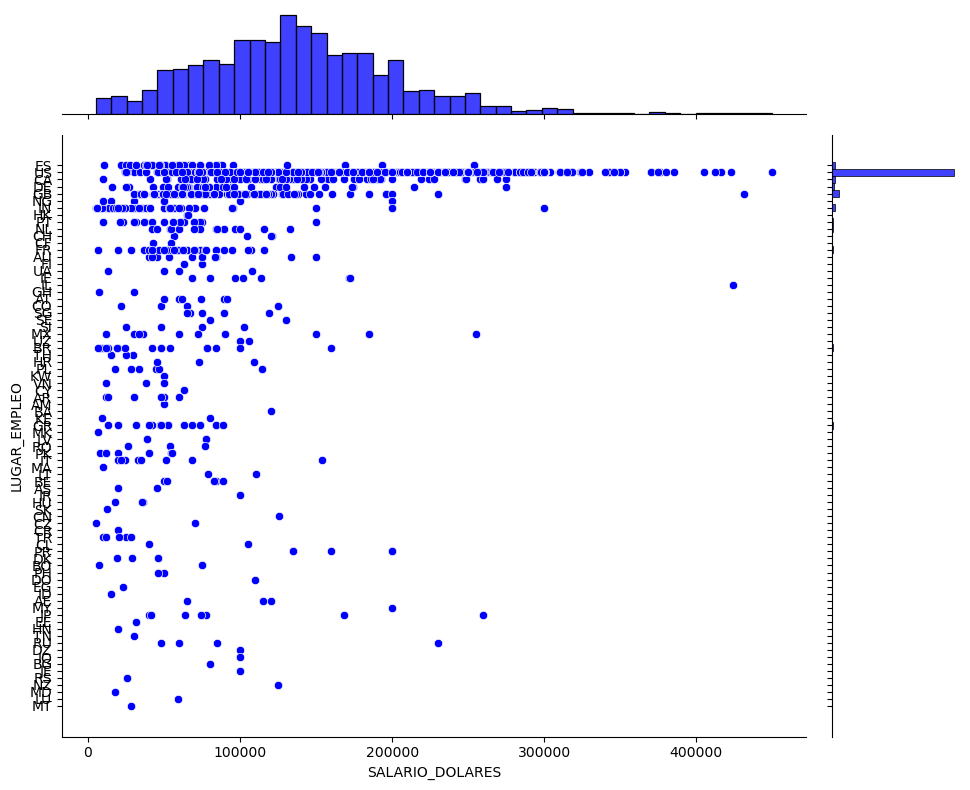

Correlacion entre SALARIO_DOLARES y PUESTO ==>  0.12087494588537936


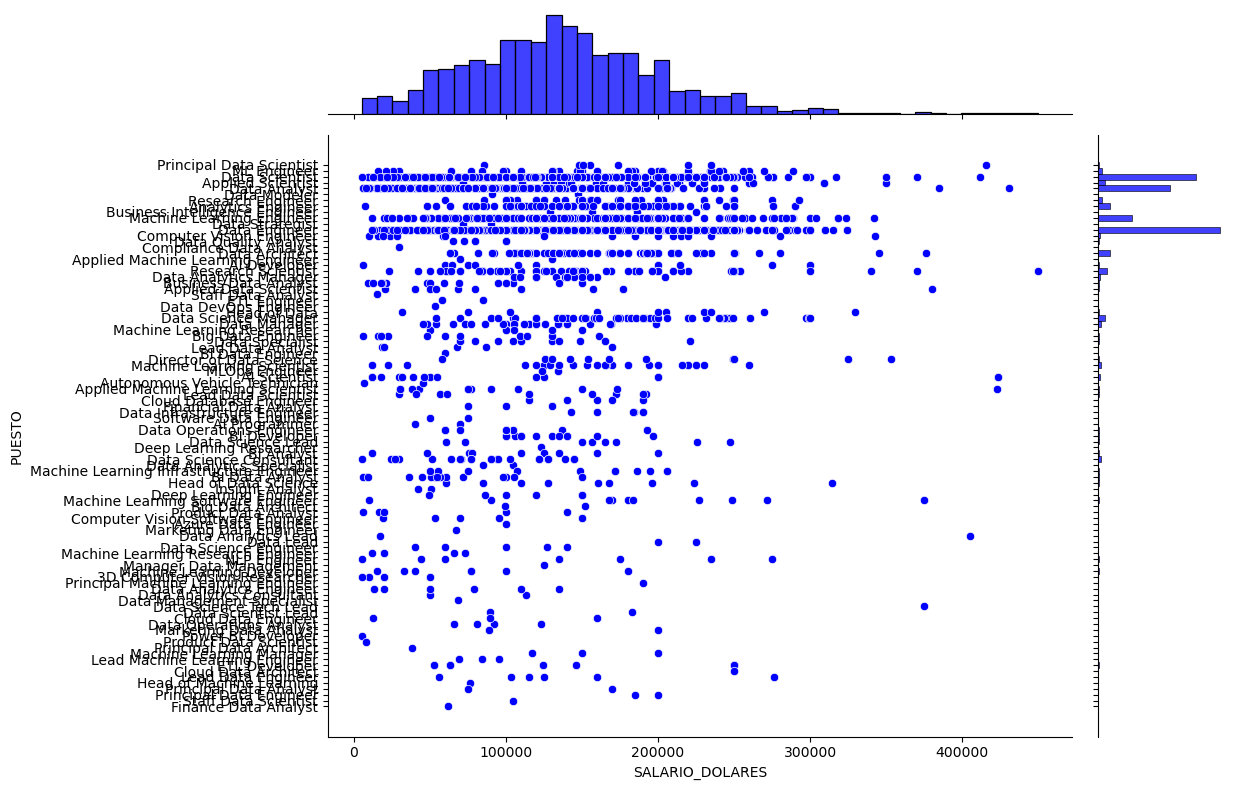

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la figura para un tamaño más grande
plt.figure(dpi=100, figsize=(10, 8))  # Tamaño aumentado a 10x8 pulgadas
print("Joint plots de SALARIO_DOLARES con LUGAR_EMPLEO y PUESTO ==> \n")

# Definir las variables de interés
variables_interes = ['LUGAR_EMPLEO', 'PUESTO']

for i in variables_interes:
    # Verificar si la columna está en la matriz de correlación
    if i in correlation_matrix.columns:
        # Imprimir la correlación entre SALARIO_DOLARES y cada variable desde la matriz de correlación
        print(f"Correlacion entre SALARIO_DOLARES y {i} ==> ", correlation_matrix.loc['SALARIO_DOLARES'][i])
        
        # Crear el JointPlot en color azul
        g = sns.jointplot(x='SALARIO_DOLARES', y=i, data=DSsal, kind='scatter', color='blue', height=8)  # Ajustar el tamaño aquí
        g.fig.set_size_inches(10, 8)  # Aumentar el tamaño del gráfico
        plt.show()
    else:
        print(f"Columna {i} no encontrada en la matriz de correlación.")

In [75]:
from pandas_profiling import ProfileReport
ProfileReport(DSsal, minimal=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8044\3269410218.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***ALGUNOS INSIGHTS Y CONCLUSIONES DEL ANÁLISIS Y EDA REALIZADO SOBRE EL DATASET DSSAL***

Se puede observar en primera instancia que la hipótesis núla no se cumple la cual apuntaba a que luego de la pandemia los salarios y puestos de trabajo irían bajando por decrecer el boom de demanda de homeoffice y de mutación a trabajo remoto y que todo volvería a la `` normalidad ´´. Parece que este efecto no sucedió sino que incluso la tendencia demuestra que está pasando lo contrario.

Los sueldos han ido aumentando como así también los puestos de trabajo
Se ha mantenido de manera razonable postpandemia un gran flujo de trabajo remoto.
Se han observado países donde la tasa de crecimiento de puestos de trabajo es enorme, como lo es EEUU. 

LA HIPÓTESIS NULA PARECIERA ESTAR SIENDO REFUTADA POR LA HIPÓTESIS ALTERNATIVA. Se tienen algunas estimaciones del porqué de esta razón, pero se estará aportando más información y datos para respaldar esto.

# ALGORITMOS Y MODELIZACIÓN

In [81]:
# Importar las librerías necesarias para su lectura y análisis preliminar
import pandas as pd
import numpy as np

In [82]:
url = "https://raw.githubusercontent.com/Rubencba222/Data-Science/refs/heads/main/1%20-%20Data%20Science%20Salaries%202023.csv"
df1 = pd.read_csv(url)
df1.head(10)

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   
5       2023               SE              FT         Applied Scientist   
6       2023               SE              FT         Applied Scientist   
7       2023               SE              FT            Data Scientist   
8       2023               SE              FT            Data Scientist   
9       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   
5  222200             USD         222200                 US             0   
6  136000             USD         136000                 US             0   
7  219000             USD         219000                 CA             0   
8  141000             USD         141000                 CA             0   
9  147100             USD         147100                 US             0   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M  
5               US            L  
6               US            L  
7               CA            M  
8               CA            M  
9               US            M

In [83]:
# Renombrar columnas para una aproximación más sencilla

nuevos_nombres = {
    'work_year': "AÑO",
    'experience_level': "NIVEL_EXPERIENCIA",
    'employment_type': "TIPO_EMPLEO",
    'job_title': "PUESTO",
    'salary': "SALARIO",
    'salary_currency': "MONEDA",
    'salary_in_usd': "SALARIO_DOLARES",
    'employee_residence': "LUGAR_EMPLEO",
    'remote_ratio': "RATIO_REMOTO",
    'company_location': "UBICACION_COMPANIA",
    'company_size': "TAMANO_COMPANIA"
}

df1.rename(columns=nuevos_nombres, inplace=True)

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 3755 non-null   int64 
 1   NIVEL_EXPERIENCIA   3755 non-null   object
 2   TIPO_EMPLEO         3755 non-null   object
 3   PUESTO              3755 non-null   object
 4   SALARIO             3755 non-null   int64 
 5   MONEDA              3755 non-null   object
 6   SALARIO_DOLARES     3755 non-null   int64 
 7   LUGAR_EMPLEO        3755 non-null   object
 8   RATIO_REMOTO        3755 non-null   int64 
 9   UBICACION_COMPANIA  3755 non-null   object
 10  TAMANO_COMPANIA     3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [85]:
# Se realiza una copia del DS para poder trabajar tranquilos y no afectar directamente el DS original
DSsal = df1.copy()
DSsal

AÑO NIVEL_EXPERIENCIA TIPO_EMPLEO                    PUESTO  SALARIO  \
0     2023                SE          FT  Principal Data Scientist    80000   
1     2023                MI          CT               ML Engineer    30000   
2     2023                MI          CT               ML Engineer    25500   
3     2023                SE          FT            Data Scientist   175000   
4     2023                SE          FT            Data Scientist   120000   
...    ...               ...         ...                       ...      ...   
3750  2020                SE          FT            Data Scientist   412000   
3751  2021                MI          FT  Principal Data Scientist   151000   
3752  2020                EN          FT            Data Scientist   105000   
3753  2020                EN          CT     Business Data Analyst   100000   
3754  2021                SE          FT      Data Science Manager  7000000   

     MONEDA  SALARIO_DOLARES LUGAR_EMPLEO  RATIO_REMOTO UBICACION_COMPANIA  \
0       EUR            85847           ES           100                 ES   
1       USD            30000           US           100                 US   
2       USD            25500           US           100                 US   
3       USD           175000           CA           100                 CA   
4       USD           120000           CA           100                 CA   
...     ...              ...          ...           ...                ...   
3750    USD           412000           US           100                 US   
3751    USD           151000           US           100                 US   
3752    USD           105000           US           100                 US   
3753    USD           100000           US           100                 US   
3754    INR            94665           IN            50                 IN   

     TAMANO_COMPANIA  
0                  L  
1                  S  
2                  S  
3                  M  
4                  M  
...              ...  
3750               L  
3751               L  
3752               S  
3753               L  
3754               L  

[3755 rows x 11 columns]

Preprocesamiento y Encoding de Datos

Antes de entrenar los modelos, es necesario procesar adecuadamente las variables.
Tareas:

    Encoding de variables categóricas: Usamos OneHotEncoder para las variables categóricas.
    Escalado de variables numéricas: Usamos StandardScaler para normalizar las variables numéricas.

Código para preprocesamiento

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separar las columnas numéricas y categóricas
numerical_columns = DSsal.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = DSsal.select_dtypes(include=['object']).columns

# Definir el preprocesamiento para columnas numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # OneHot Encoding
])

# Combinación de los preprocesamientos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Separar las características y la variable objetivo
X = DSsal.drop(columns=['SALARIO_DOLARES'])  # Características
y = DSsal['SALARIO_DOLARES']  # Variable objetivo

Generar y Entrenar 3 Modelos

Seleccionamos tres modelos de regresión, que son apropiados para predecir la tendencia de los salarios: RandomForestRegressor, GradientBoostingRegressor, y XGBRegressor.
Código para crear y entrenar los modelos

In [96]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Aseguramos que DSsal es un DataFrame y que las variables estén bien definidas
X = DSsal.drop(columns=['SALARIO_DOLARES'])  # Características
y = DSsal['SALARIO_DOLARES']  # Variable objetivo

# Asegúrate de que las columnas numéricas y categóricas sean identificadas correctamente
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Definir el preprocesamiento para columnas numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # OneHot Encoding
])

# Combinación de los preprocesamientos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Crear los modelos
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Aplicar el preprocesamiento y entrenar los modelos
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Validación cruzada con 5 pliegues
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # Usamos MSE
    print(f'{name} - MSE: {scores.mean()}')

RandomForest - MSE: -71682160.41248423
GradientBoosting - MSE: -35855256.05306672
XGBoost - MSE: -49054462.62444062


Técnica PCA y Reducción de Dimensionalidad

Aplicamos PCA para reducir la dimensionalidad de las características. Evaluamos si esta técnica mejora o empeora el rendimiento de los modelos.

Código para PCA

In [97]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Crear un pipeline con PCA y modelo
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),  # Reducir a 2 componentes principales
    ('model', RandomForestRegressor())
])

# Validación cruzada con PCA
pca_scores = cross_val_score(pca_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'PCA - MSE: {pca_scores.mean()}')

PCA - MSE: -426166145.7914629


Optimización de Hiperparámetros

Aplicamos GridSearchCV para optimizar los hiperparámetros del modelo y encontrar la mejor combinación de parámetros para el modelo de RandomForestRegressor.

Código para optimización de hiperparámetros

In [100]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros para búsqueda
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [5, 10],
}

# Grid Search en el RandomForest
grid_search = GridSearchCV(estimator=Pipeline(steps=[('preprocessor', preprocessor),
                                                     ('model', RandomForestRegressor())]),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X, y)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 50}


Métodos de Ensamble (Boosting y Bagging)

Probamos diferentes métodos de ensamble, como AdaBoost, Gradient Boosting, y XGBoost, para mejorar la predicción.

Código para aplicar ensamble

In [3]:
from sklearn.ensemble import AdaBoostRegressor

# Crear el modelo de AdaBoost
ada_model = AdaBoostRegressor(base_estimator=RandomForestRegressor(),
                              n_estimators=100, random_state=42)

# Validación cruzada
ada_scores = cross_val_score(ada_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'AdaBoost - MSE: {ada_scores.mean()}')

NameError: name 'RandomForestRegressor' is not defined

Evaluación y Selección del Mejor Modelo

Después de entrenar los modelos y optimizar los hiperparámetros, utilizamos el MSE (Mean Squared Error) para comparar los rendimientos de los modelos. El modelo con el menor MSE es el que seleccionaremos